In [1]:
import pandas as pd
import numpy as np
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import os
import csv
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [2]:
cd DeskTop/5 Data Visualization/google_transit

/Users/chenyuwei/Desktop/5 Data Visualization/google_transit


In [3]:
df_shapes = pd.read_csv("shapes.txt").groupby('shape_id')
#df_shapes.head()

In [ ]:
#NOTICE: I preprocess the data for this part using MySQL and produced the "shape_per_hour.csv"
# The preprocess sql file has been uploaded and can be checked
# "shape_per_hour.csv" is about how many trips a transit can be run in one hour
# Here I use transit frequency to answer the question of "How quickly...?"

In [4]:
df_frequency = pd.read_csv("shape_per_hour.csv")
#df_frequency.head()

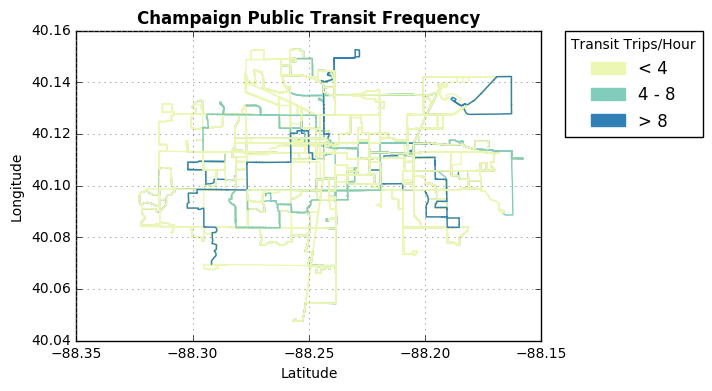

In [5]:
plt.title('Champaign Public Transit Frequency',fontweight= 'bold')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

shallow_patch = mpatches.Patch(color='#EDF7B4', label='< 4')
middle_patch = mpatches.Patch(color='#82CCBB', label='4 - 8')
dark_patch = mpatches.Patch(color='#3180B6', label='> 8')
plt.legend(title="Transit Trips/Hour",handles=[shallow_patch,middle_patch,dark_patch],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.grid(color='gray', linestyle='dotted')

for name, group in df_shapes:
    clr = df_frequency[df_frequency['shape_id'] == name]['color'].iloc[0]
    plt.plot(group['shape_pt_lon'], group['shape_pt_lat'], color=clr)
    

In [67]:
# Let's focus on a specific route(shape) '[@14.0.56288404@][41][1316446361177]/2__R2_MF'

In [29]:
# First, find out the stops this trips passed
df_stop_times = pd.read_csv("stop_times.txt")

In [3]:
df_stop_pass = pd.read_csv('pass_stops.csv')

In [4]:
df_stop_pass.head()

,stop_id,stop_lat,stop_lon
0,BTSLRMN:2,40.117478,-88.189460
1,GRDBTZ:3,40.117090,-88.183917
2,SMITH150:3,40.114167,-88.179472
3,150DOD:5,40.114158,-88.173105
4,150UNI:4,40.116542,-88.183840


In [7]:
df_spec_shape = pd.read_csv("shape_area_color.csv").groupby('area')
#df_spec_shape.head()

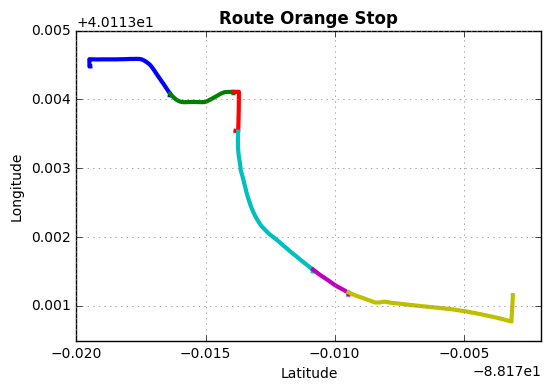

In [8]:
plt.title('Route Orange Stop',fontweight= 'bold')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.grid(color='gray', linestyle='dotted')

for name,group in df_spec_shape:
    plt.plot(group['shape_pt_lon'], group['shape_pt_lat'],lw=3)

In [9]:
df_speed_area_color = pd.read_csv("speed_area_color.csv")
df_speed_area_color.head()

,stop_seq,stop_id,diff_time,diff_dist,color,speed
0,1,GRD:1,0.4167,299,#82CCBB,717.543
1,2,GRDBTZ:3,0.3333,218,#82CCBB,654.065
2,3,150UNI:4,0.2500,93,#3180B6,372.000
3,4,150DALE:3,0.6667,374,#3180B6,560.972
4,5,SMITH150:3,0.3333,129,#3180B6,387.039


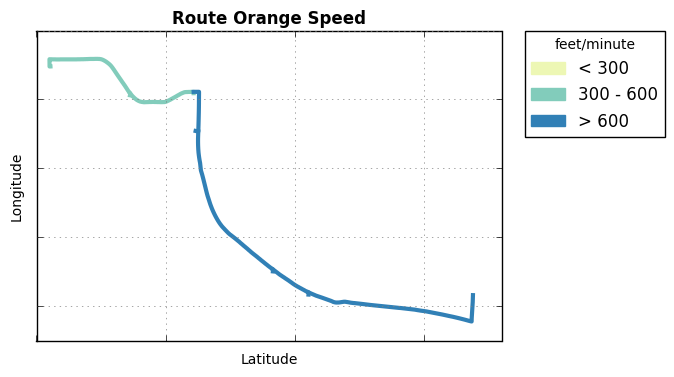

In [10]:
plt.title('Route Orange Speed',fontweight= 'bold')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

shallow_patch = mpatches.Patch(color='#EDF7B4', label='< 300')
middle_patch = mpatches.Patch(color='#82CCBB', label='300 - 600')
dark_patch = mpatches.Patch(color='#3180B6', label='> 600')
plt.legend(title="feet/minute",handles=[shallow_patch,middle_patch,dark_patch],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.grid(color='gray', linestyle='dotted')

for name,group in df_spec_shape:
    clr = df_speed_area_color[df_speed_area_color['stop_seq']==name]['color'].iloc[0]
    plt.plot(group['shape_pt_lon'], group['shape_pt_lat'],color=clr,lw=3)

ax = plt.gca()
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

plt.savefig("Route Orange Speed.png",bbox_inches='tight')

In [11]:
df_speed_color = pd.read_csv("speed_color.csv")
df_speed_color.head()

,shape_id,shape_len,period,speed_miles_per_minute,color
0,1 YELLOW ALT 25,15081,47.0,320.872340,#3180B6
1,100 LATE 3,4498,14.0,321.285714,#3180B6
2,100 LATE 5,11485,29.0,396.034483,#3180B6
3,100N,25849,70.0,369.271429,#3180B6
4,100N->IT,16246,45.0,361.022222,#3180B6


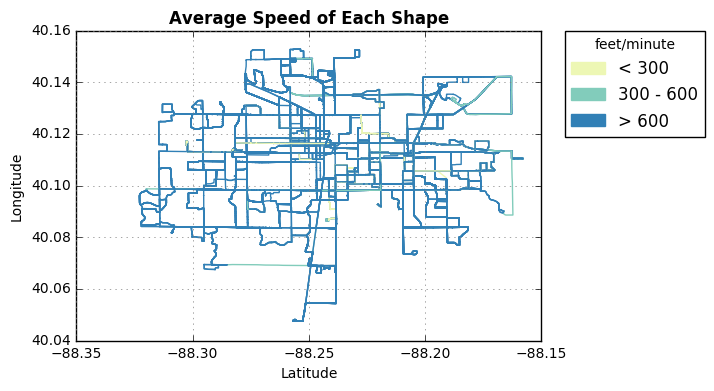

In [12]:
plt.title('Average Speed of Each Shape',fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

shallow_patch = mpatches.Patch(color='#EDF7B4', label='< 300')
middle_patch = mpatches.Patch(color='#82CCBB', label='300 - 600')
dark_patch = mpatches.Patch(color='#3180B6', label='> 600')
plt.legend(title="feet/minute",handles=[shallow_patch,middle_patch,dark_patch],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.grid(color='gray', linestyle='dotted')

for name, group in df_shapes:
    clr = df_speed_color[df_speed_color['shape_id'] == name]['color'].iloc[0]
    plt.plot(group['shape_pt_lon'], group['shape_pt_lat'], color=clr)
    
plt.savefig("Average_speed_of_Trips.png",bbox_inches='tight')